## 성능평가

- 평가 항목 방식 케이스
    - 지도학습의 분류
        - 혼동행렬(정확도, f1-score, 정밀도, 재현율), AUC, ROC
    - 지도학습의 회귀
        - 손실
    - 비지도학습
    - 강화학습

### 머신러닝 > 지도학습 > 분류 > 성능평가 지표

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 개요
    - 예측값이 실제 관측값을 얼마나 정확하게 예측했는가?
    - 이 사항을 보여주는 행렬
    - 예
        - 암 여부를 예측했는데 실제로도 악성인지 예측하는 예
        - 실제는 병이 있었는데 있다고 예측/없다고 예측
        - 실제는 병이 없었는데 있다고 예측/없다고 예측

|실제|예측 Positive|예측 Negative|
|:--:|:--:|:--:|
|Positive|TP|FN|
|Negative|FP|TN|

- 참긍정: TP
    - 병이 있다고 예측, 실제로 병이 있음
- 참부정: TN
    - 병이 없다고 예측, 실제로 병이 없음
- 거짓긍정: FP(1종 오류)
    - 병이 있다고 예측, 실제로 병이 없음
- 거짓부정: FN(2종 오류)
    - 병이 없다고 예측, 실제로 병이 있음

- 정밀도(precision)
    - 병이 있다고 예측을 했는데, 실제로 병이 있는 비율. 정답율
    - P = TP / (TP + FP)
- 재현율(recall)
    - 실제로 병이 있는 전체 데이터 중에 참긍정 비율
    - R = TP / (TP + FN)
- F1 점수
    - 정밀도와 재현율의 조화평균(Harmonic mean)
    - F1 = 2 / (1/P + 1/R)
- 특이성
    - 실제 병이 없는 전체 중 참부정(TN)의 비율
    - TN / (TN + FP)
- 곡선하 면적(ROC): Area under Curve ROC => ROC 곡선
    - 참긍정률과 거짓부정률 사이의 관계 표현
    - 1 - 특이성
    - AUC: ROC의 상세값(수치)

#### 실제 데이터를 이용하여 성능평가를 수행

- 데이터: 아이리스 활용

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
ds = load_iris()
ds.data[:1], ds.feature_names, ds.target_names, ds.target[-3:]

(array([[5.1, 3.5, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([2, 2, 2]))

In [25]:
def attach_iris():
    ds = load_iris()
    df = pd.DataFrame(ds.data, columns=ds.feature_names)
    # species라는 컬럼 추가 => 값은 setosa, versicolor, virginica 중 하나로 설정
    df['species'] = ds.target_names[ds.target]
#     df['species'] = ds.target
    return df
df = attach_iris()
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 분류 알고리즘을 다양하게 사용하여 교차 성능평가 수행

- 하이퍼파라미터 튜닝 + 파이프라인
- 각각 알고리즘별로 적용하여 시각화 및 수치 비교(사용)

In [29]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [30]:
# 알고리즘
# 향후 알고리즘에 대한 이해와 데이터에 대한 적합성에 대한 식견이 좀 더 보완되면 알고리즘 후보를 적합하게 추릴 수 있을 것
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
# 알고리즘 시각화를 위해 사전 설정
# 선형 그래프의 모양을 지정
# 파라미터 값은 임의로 부여
class_map = {
    'LogisticRegression':('-', LogisticRegression() ),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5) ),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                                                           n_estimators=10, max_features=1) ),
    'GaussianNB':(':', GaussianNB() )
}

In [36]:
for k, v in class_map.items():
    print(k,v)

LogisticRegression ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
DecisionTreeClassifier ('--', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))
RandomForestClassifier ('.-', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                    

In [37]:
# 데이터 정리
X = df[df.columns[:4]]
X.shape

(150, 4)

In [39]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
Y = df['species'] == 'versicolor'
type(Y), Y[:2]

(pandas.core.series.Series, 0    False
 1    False
 Name: species, dtype: bool)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 4), (120, 4), (30,), (120,))

LogisticRegression : 0.780943336498892
DecisionTreeClassifier : 0.949667616334283
RandomForestClassifier : 0.9838556505223173
GaussianNB : 0.9838556505223172


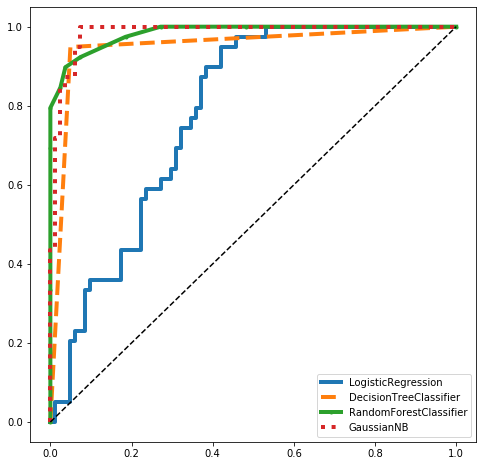

In [54]:
class_map = {
    'LogisticRegression':('-', LogisticRegression() ),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5) ),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                                                           n_estimators=10, max_features=1) ),
    'GaussianNB':(':', GaussianNB() )
}

# 시각화를 통해 성능 확인(ROC, AUC)
plt.figure( figsize=(8,8) )

for name, (lineStyle, model) in class_map.items():
    model.fit(X_train, y_train)
    # 에측
    # 예측에 대한 확률로 예측: 0,1 중 1이 될 확률이 0.57% => 1을 더 많이 예측하는 모델
    preds = model.predict_proba(X_test)
    # preds의 type을 y_test에 맞춰줌(Series)
    pred = pd.Series( preds[:,1] )
    # ROC 값 획득
    # return 1.fpr: 거짓양성비/ 2. tpr: 참양성비 / 3. 버리는 변수(결정함수가 사용한 임계값. 지금 필요없지만 받기는 해야 함)
    fpr, tpr, _ = roc_curve( y_test, pred )
    # ROC 드로잉
    # AUC 표시 -> 수치
    auc_score = auc(fpr, tpr)
    print( f'{name} : {auc_score}')
    
    # 선 그리기
    plt.plot(fpr, tpr, lineStyle, linewidth=4, label=name )
    pass

# 시각화 마무리
plt.legend() # 범례 표시
plt.plot( [0,1], [0,1], 'k--' ) # 대각선
plt.show()

In [56]:
from sklearn.svm import SVC

LogisticRegression : 0.780943336498892
DecisionTreeClassifier : 0.949667616334283
RandomForestClassifier : 0.9708768597657487
GaussianNB : 0.9838556505223172
SVC : 0.9879708768597657


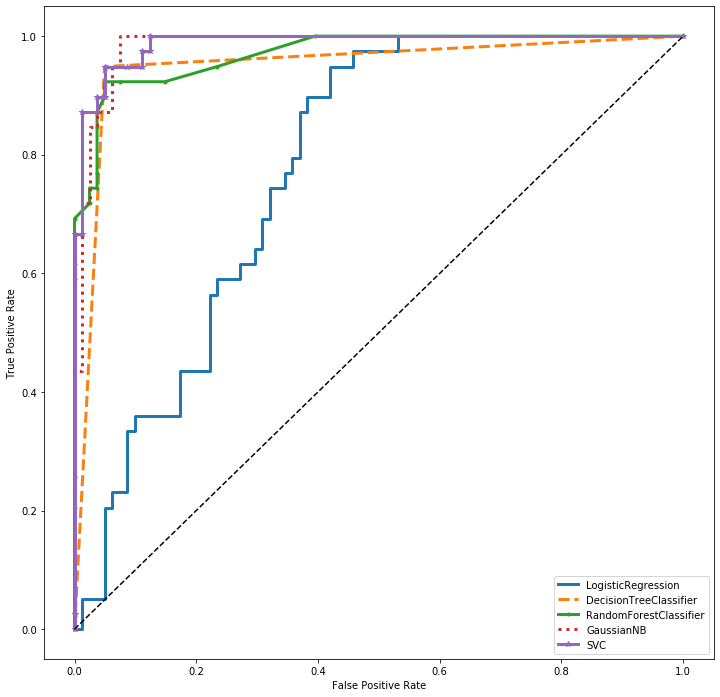

In [70]:
class_map = {
    'LogisticRegression':('-', LogisticRegression() ),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5) ),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                                                           n_estimators=10, max_features=1) ),
    'GaussianNB':(':', GaussianNB() ),
    'SVC':('-*', SVC(probability=True) )
}
plt.figure( figsize=(12,12) )

for name, (lineStyle, model) in class_map.items():
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    pred = pd.Series( preds[:,1] )
    fpr, tpr, _ = roc_curve( y_test, pred )
    auc_score = auc(fpr, tpr)
    print( f'{name} : {auc_score}')
    plt.plot(fpr, tpr, lineStyle, linewidth=3, label=name )
    pass

plt.legend()
plt.plot( [0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.ylim(0.4,1)
plt.show()